# Leistungsnachweis2 
Gruppe: Ajna Aliji & Melisa Dedukic

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 
- Child mortality
### 1.2 Fragestellung:
Fragestellungen:
1. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
2. Welche Länder haben derzeit die höchste bzw. niedrigste Kindersterblichkeitsrate?
3. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern? 
4. Bei welchen Ländern, stagniert bzw. Steigt die Kindersterblichkeitrate?
5. Welche Regionen zeigen den grössten Rückgang in der Kindersterblichkeits?
6. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen städtischen und ländlichen Rgionen?  
### 1.3 Datenquelle(n):
Quellen:
- https://childmortality.org/all-cause-mortality/data
- https://www.gapminder.org/data/documentation/gd005/  
- https://ourworldindata.org/population-sources 






### 1.4 Daten beschaffen und laden

In [2]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
datei_pfad = "child-mortality.csv"
daten= pd.read_csv(datei_pfad)

print(daten.head())


        Entity Code  Year  Under-five mortality rate
0  Afghanistan  AFG  2014                   7.528273
1  Afghanistan  AFG  2015                   7.267698
2  Afghanistan  AFG  2016                   7.023421
3  Afghanistan  AFG  2017                   6.791161
4  Afghanistan  AFG  2018                   6.575211


In [52]:
# loading the data
df = pd.read_csv('child-mortality.csv', skiprows=1,
                 names=['Entity','Code','Year','Under-five mortality rate']) 
df.head()

,Entity,Code,Year,Under-five mortality rate
0,Afghanistan,AFG,2014,7.528273
1,Afghanistan,AFG,2015,7.267698
2,Afghanistan,AFG,2016,7.023421
3,Afghanistan,AFG,2017,6.791161
4,Afghanistan,AFG,2018,6.575211


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

In [53]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Under-five mortality rate')
df_pivot.head()

Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.796442,7.577729,7.376779,7.170871,6.982090,6.792204,6.606280,6.420107,6.232287,6.053605
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [54]:
df.dtypes

Entity                        object
Code                          object
Year                           int64
Under-five mortality rate    float64
dtype: object

### 3.1 Analyse Gebiete

In [55]:
print('Anzahl verschiedener Entity: ', len(df['Entity'].unique()))

Anzahl verschiedener Entity:  233


In [57]:
# Anzahl Datenpunkte pro Gebiet
df['Entity'].value_counts()

Entity
Sweden                                       272
Austria                                      213
France                                       207
Belgium                                      189
Denmark                                      188
                                            ... 
Lower-middle-income countries                 33
South-Eastern Asia (SDG)                      33
Southern Asia (SDG)                           33
Sub-Saharan Africa (SDG)                      33
Eastern Asia and South-Eastern Asia (SDG)     33
Name: count, Length: 233, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

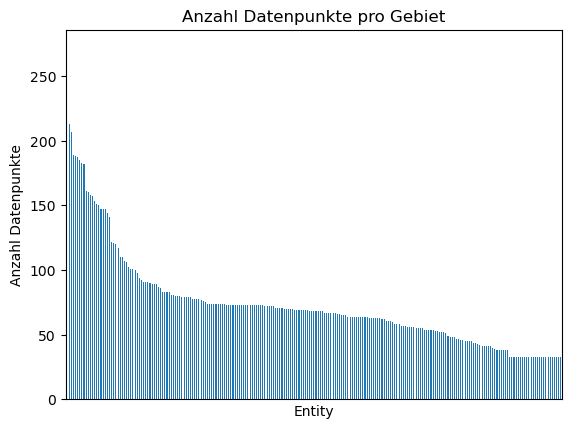

In [58]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

### 3.3 Analyse Jahr

In [40]:
print('Anzahl verschiedener Year: ', len(df['Year'].unique()))

Anzahl verschiedener Year:  272


In [6]:
data_per_year = df['Year'].value_counts().sort_index()
print(data_per_year)

Year
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64


In [7]:
total_countries = len(df['Entity'].unique())

years_with_all_countries = df['Year'].value_counts()
years_with_all_countries = years_with_all_countries[years_with_all_countries == total_countries]
print("Jahre, in denen alle Länder erfasst wurden:")
print(years_with_all_countries)

Jahre, in denen alle Länder erfasst wurden:
Year
2003    233
2002    233
1992    233
1993    233
1994    233
1995    233
1996    233
1997    233
1998    233
1999    233
2000    233
2001    233
1991    233
1990    233
2004    233
2005    233
2006    233
2007    233
2008    233
2009    233
2010    233
Name: count, dtype: int64


In [41]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64

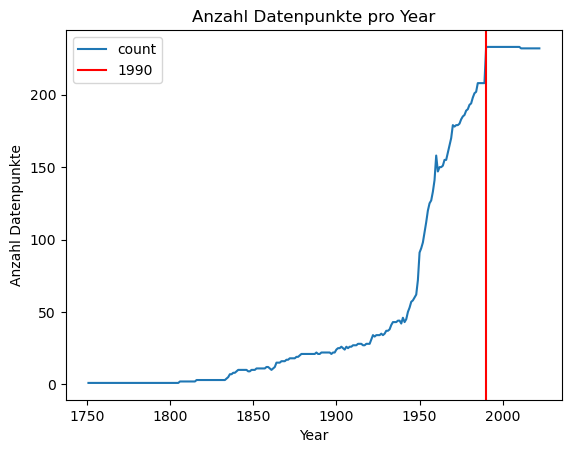

In [13]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Year');
g.axvline(x=1990, color='red',label='1990') # rote Linie bei 1990 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Lebenserwartung

In [44]:
df.describe()

,Year,Under-five mortality rate
count,17183.000000,17183.000000
mean,1975.538963,10.386308
std,40.212128,10.398669
min,1751.000000,0.146058
25%,1961.000000,2.173641
50%,1985.000000,6.395330
75%,2004.000000,16.118613
max,2022.000000,68.208000


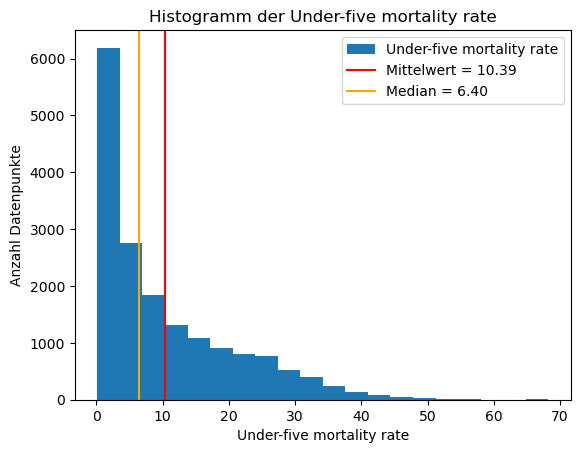

In [18]:
g = df['Under-five mortality rate'].plot(kind='hist', bins=20, title='Histogramm der Under-five mortality rate', 
                           xlabel='Under-five mortality rate', ylabel='Anzahl Datenpunkte')
mean = df['Under-five mortality rate'].mean()
g.axvline(x=df['Under-five mortality rate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Under-five mortality rate'].median()
g.axvline(x=df['Under-five mortality rate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Vorgehen

### Beobachtungen

### Interpretation
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



### Berechnungen

In [22]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Under-five mortality rate')

In [27]:
diffs = df_pivot[2012]-df_pivot[2022]   # Differenz zwischen 2012 und 2022
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Entity
Dominica       -0.754504
Fiji           -0.701049
Venezuela      -0.676667
Lebanon        -0.502895
Palau          -0.265259
                  ...   
Burkina Faso    3.314599
Chad            3.686804
Angola          3.737656
Somalia         4.010715
Sierra Leone    4.675695
Length: 232, dtype: float64

IndexError: index 0 is out of bounds for axis 0 with size 0

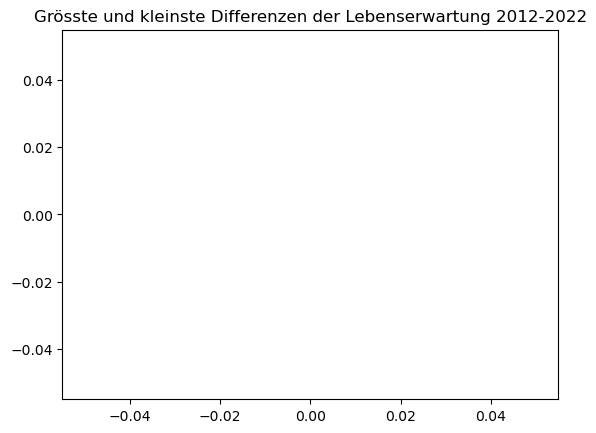

In [32]:
diff_sel = (diffs < -4) | (diffs > 5)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2012-2022')

In [33]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

[]


### Visualisierung

In [59]:
Entity_list = daten['Entity'].unique()
print(Entity-list)

NameError: name 'Entity' is not defined

In [ ]:
color_dict = {
    'Sierra Leone': 'blue',
    'Angola': 'cyan',
    'Somalia': 'lightgreen',
    'Chad': 'green',
    'Malawi': 'red',
    'Palau': 'orange',
    'Lebanon': 'yellow',
    'Fiji': 'brown',
    'Venezuela': 'pink',
    'Domenica': 'purple',
    
}

for entity in Entity_liste:
    diff = diffs[entity]
    g = df_pivot.loc[entity].plot(title='Under-five mortality rate', xlabel='Year', ylabel=f'Under-five mortality rate', legend=True,
                                  label=f'{entity} - Diff. 2021-2011: {diff:.2f}', # für die Legende
                                  xlim=[1980,2025], ylim=[0,80],   # x- und y-Achsen begrenzen
                                  color=color_dict[entity],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# HIV Pandemie
g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'HIV');

NameError: name 'Entitiy_liste' is not defined